##Step 1: Load and Prepare the Data

In [49]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Load data
housing = fetch_california_housing()
data = pd.DataFrame(housing.data, columns=housing.feature_names)
data['MedHouseVal'] = pd.Series(housing.target)

X = data.drop('MedHouseVal', axis=1)
y = data['MedHouseVal']

X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [55]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the features
scalar = StandardScaler()
X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)


##Step 2: Build the Neural Network

In [56]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

# Build the model
model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)  # Output layer for regression. No activation
])



##Step 3: Compile the Model

In [57]:
model.compile(
    optimizer='adam',
    loss='mean_squared_error',
    metrics=['mae']
)

In [58]:
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_21 (Dense)                │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,689 (10.50 KB)

 Trainable params: 2,689 (10.50 KB)

 Non-trainable params: 0 (0.00 B)

##Step 4: Train the Model

In [59]:
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=10,
    batch_size=32,
    verbose=1
)


Epoch 1/10
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 1.6370 - mae: 0.8980 - val_loss: 0.4858 - val_mae: 0.5066
Epoch 2/10
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4272 - mae: 0.4643 - val_loss: 0.4048 - val_mae: 0.4453
Epoch 3/10
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3659 - mae: 0.4341 - val_loss: 0.3907 - val_mae: 0.4390
Epoch 4/10
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.3533 - mae: 0.4188 - val_loss: 0.3825 - val_mae: 0.4322
Epoch 5/10
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.3507 - mae: 0.4158 - val_loss: 0.4095 - val_mae: 0.4264
Epoch 6/10
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3418 - mae: 0.4063 - val_loss: 0.3751 - val_mae: 0.4149
Epoch 7/10
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3104 - mae: 0.3952 - val_loss: 0.3547 - val_mae: 0.4061
Epoch 8/10
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3327 - mae: 0.3988 - val_loss: 0.3795 - val_mae: 0.4052
Epoch 9/10
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - lo

##Step 5: Evaluate and Visualize Performance

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3085 - mae: 0.3814

Test MSE: 0.3168


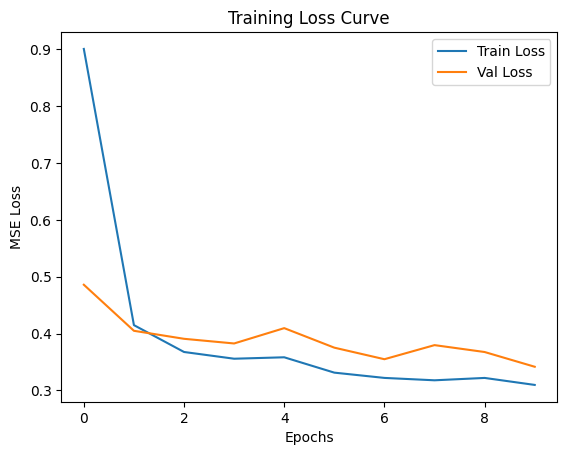

In [69]:
import matplotlib.pyplot as plt

# Evaluate
loss, mae = model.evaluate(X_test, y_test)
print(f"\nTest MSE: {loss:.4f}")

# Plot training loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epochs')
plt.ylabel('MSE Loss')
plt.legend()
plt.title("Training Loss Curve")
plt.show()

##Step 5: Make prediction

In [65]:
y_pred = model.predict(X_test).flatten()


129/129 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [68]:
# Create a DataFrame to compare
comparison_df = pd.DataFrame({
    'Predicted': y_pred,
    'Actual': y_test
})

# Optionally round for easier reading
comparison_df = comparison_df.round(3)

# Display the first 10 rows
print(comparison_df.head(10))

       Predicted  Actual
20046      0.400   0.477
3024       1.531   0.458
15663      4.427   5.000
20484      2.625   2.186
9814       2.984   2.780
13311      1.763   1.587
7113       2.487   1.982
7668       1.572   1.575
18246      2.464   3.400
5723       4.347   4.466


##Step 6: Calculate the Mean Squared Error

In [72]:
from sklearn.metrics import mean_squared_error
# Calculate the MSE
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.4f}")

Mean Squared Error (MSE): 0.3168


##Step 7: Save Model

In [75]:
model.save('california_housing_model.h5')